In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


### Guiding questions for my analysis:

1. How many medals have been given in each category?
2. What sports are the most popular?
3. How many men and women have participated in the Olympic games?
4. Find the correlation between Height, Weight and Sex of the Athlete.
5. Identify Atypical values in the "Age" section, and see how this affect the kind of discipline performed by the athletes.

### Importing the data and veryfing if its importation was successful

> **Note: This dataset is from five years ago, so the last OOGG in Tokyo will not be taken into account during the analysis**

In [2]:
df = pd.read_csv ('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Dataset Description

In [3]:
df.shape

(271116, 15)

### Initial Revision

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


We can observe that there is missing data within some of the numeric columns **(Age, Weight and Height)** and also in the **Medals** Column, that we are going to have to deal with later on our Analysis.

### Missing Values' Handling

**Replacing the numeric values with the mean of each column**

* This is not always the best practice to do and there are some others, so which one to choose depends on the type of analysis that is being conducted

In [5]:
numeric_columns = df.select_dtypes(include = ['number'])

for column in numeric_columns.columns:
    df[column] = df[column].fillna(df[column].mean())

#### Veryfing if the missing values were replaced correctly

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Great! now let's fill in the entries with missing info in the "Medals" Column. This is easier to do, because this column has a Dtype = object (a text object) so we can enter any piece of text that we want to replace the Null values.

In [7]:
df['Medal'] = df['Medal'].fillna("No medal info")

#### Verifying again

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


#### Now we can see that there are not empty entries. Let's move on and start analysing the data, starting with the age.

In [9]:
#Importing neccesary libraries 

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

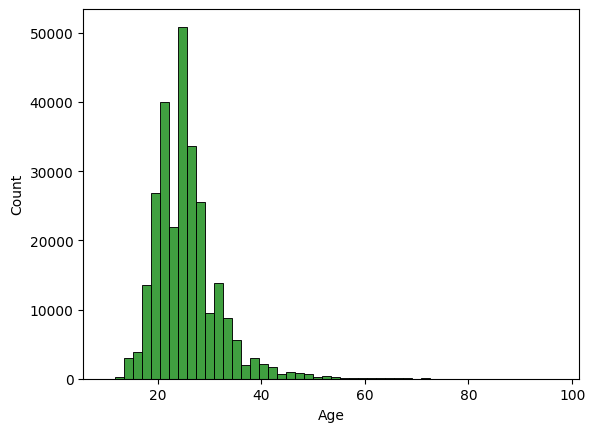

In [37]:
sns.histplot(data=df, x = "Age", bins = 50, color = "Green")

This graphic tells us that most of the athletes are between the 20-40 age range, but there are many exceptions, which we call **Atypical Values**. let's take a closer look to them with a boxplot.

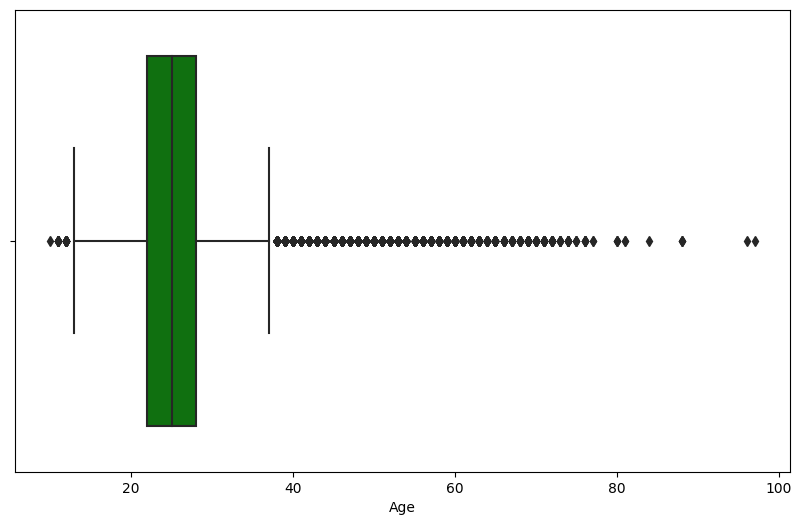

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df["Age"],color = "Green")
plt.show()

* This boxplot graphic has a lot of info for us. First, the colored box shows us where the most data is, and the 3 lines that divide it are the 25%, 50% and 75% quartiles. The lines on both sides of it determine the range in which an entry has to be in order to be a typical value, Which means that all the dots outside them are Atypical Values. 

**Next, I am going to discover which ages represent those lines, to start making a deeper analysis.**

In [12]:
from scipy import stats

# Finding the interquartilic range

stats.iqr(df["Age"])

6.0

Knowing the interquartilic range **(6)**, now we can determine the lowest and highest value of the typical values.

In [13]:
# Highest Value (75% quartile + (1.5 * IQR))

28 + (1.5 * 6)

37.0

In [14]:
# Lowest Value (25% quartile - (1.5 * IQR))

22 - (1.5 * 6)

13.0

Perfect! **Any value lower than 13 or higher than 37 is catalogued as Atypical**. The next thing to do is discovering how many athletes' age is non typical.

In [15]:
elder_athletes = df[df['Age'] > 37]
elder_athletes.shape

(11928, 15)

In [16]:
young_athletes = df[df['Age'] < 13]
young_athletes.shape

(53, 15)

Almost 12000 athletes are beyond the highest typical value of 37 years old, whereas only 53 are younger than 13 years old. But, what sports they are choosing? Let's find out.

In [17]:
elder_athletes['Sport'].value_counts()

Sport
Shooting                 3178
Art Competitions         2226
Equestrianism            1997
Sailing                  1040
Fencing                  1031
Athletics                 408
Archery                   311
Bobsleigh                 230
Gymnastics                167
Rowing                    122
Cycling                    99
Curling                    98
Table Tennis               83
Cross Country Skiing       81
Biathlon                   78
Canoeing                   71
Tennis                     70
Ice Hockey                 51
Wrestling                  46
Golf                       42
Weightlifting              42
Speed Skating              36
Polo                       33
Figure Skating             30
Handball                   29
Water Polo                 29
Hockey                     29
Luge                       26
Alpine Skiing              25
Skeleton                   23
Beach Volleyball           16
Tug-Of-War                 15
Volleyball                 15
Judo

In [18]:
young_athletes['Sport'].value_counts()

Sport
Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Diving             1
Name: count, dtype: int64

##### With this information, the conclusion we can make is that the oldest the athlete, the less physical-demanding discipline they perform.
* We can see how the youngest athletes tend to choose sports in which  physical condition, strength and coordination are very important factors (such as Swimming or Gymnastics).
* On the other hand, the "more experienced" athletes lean towards disciplines that have to do with practise, precision and mental rather than physical skills (such as Art Competitions or Shooting).

### Info on the different categories

In [19]:
#Discovering which columns have text 

text_columns = df.select_dtypes(include = ['object'])

In [20]:
text_columns.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [21]:
#Taking a look into the data

for column in text_columns.columns:
    if column != 'Name':
        print(df[column].value_counts().head())
        print()

Sex
M    196594
F     74522
Name: count, dtype: int64

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64

Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: count, dtype: int64

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

City
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: count, dtype: int64

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: count, dtype: int64

Event
Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: count, dtype: int64

This shows us info such as how many men and women have participated during all the Olympics Games, which are the countries that have sent more athletes, the more concurred years and cities, the most popular events, etc.

* *It's worth mentioning how much data has been lost related to the Medal Section of the DataFrame.*


Now that we have done a general analysis of the Data and found out many things, it's time to group the relevant data, taking into account different variables that are going to be useful to discover specific information that we could possibly want to know.

### Grouping the data

In [22]:
# Physical features 

df.groupby('Year')[['Age', 'Height', 'Weight']].agg(['min', 'max', 'mean'])

Age                  Height                    Weight                  
       min   max       mean    min    max        mean    min    max       mean
Year                                                                          
1896  10.0  40.0  24.428354  154.0  188.0  175.024252   45.0  106.0  70.790769
1900  13.0  71.0  27.615160  153.0  191.0  175.416800   51.0  102.0  70.859682
1904  14.0  71.0  26.457794  155.0  195.0  175.412605   43.0  115.0  70.871300
1906  13.0  54.0  26.452842  165.0  196.0  175.764177   52.0  114.0  71.319248
1908  14.0  61.0  26.674436  157.0  201.0  175.676599   51.0  115.0  71.431914
1912  13.0  67.0  27.462098  157.0  200.0  175.715357   49.0  125.0  71.058674
1920  13.0  72.0  28.555820  142.0  197.0  175.412831   48.0  146.0  70.966180
1924  11.0  81.0  27.808357  142.0  200.0  175.274653   44.0  146.0  70.820670
1928  11.0  97.0  28.498259  147.0  211.0  175.308023   41.0  125.0  70.739114
1932  11.0  96.0  31.884004  147.0  200.0  174.930307   41.0  110.0  70.676251
1936  11.0  74.0  27.473533  147.0  205.0  175.400981   37.0  138.0  70.809505
1948  12.0  84.0  28.276593  140.0  213.0  175.469283   47.0  125.0  70.842707
1952  12.0  65.0  26.143648  150.0  213.0  175.058390   42.0  145.0  70.546309
1956  12.0  67.0  25.890006  137.0  218.0  174.738648   28.0  141.0  70.571617
1960  11.0  65.0  25.178135  137.0  218.0  173.369978   36.0  141.0  69.472616
1964  12.0  60.0  24.948015  137.0  218.0  173.584371   38.0  163.0  69.784366
1968  11.0  68.0  24.262784  127.0  216.0  173.966205   34.0  163.0  69.614725
1972  12.0  69.0  24.318627  130.0  223.0  174.584834   38.0  182.0  70.025272
1976  12.0  70.0  23.850310  136.0  220.0  174.955431   30.0  163.0  70.179572
1980  13.0  70.0  23.733707  131.0  220.0  175.515085   25.0  190.0  70.716586
1984  12.0  60.0  23.929262  132.0  218.0  175.530437   31.0  150.0  70.267177
1988  11.0  70.0  24.090506  127.0  223.0  175.719423   32.0  161.0  70.499045
1992  11.0  62.0  24.322214  136.0  223.0  176.012991   30.0  176.5  71.054192
1994  13.0  46.0  24.422821  148.0  200.0  175.179869   40.0  113.0  71.040586
1996  12.0  63.0  24.915418  136.0  223.0  175.819609   30.0  176.5  70.876734
1998  14.0  50.0  25.163416  142.0  200.0  174.599022   32.0  123.0  70.937977
2000  13.0  63.0  25.422513  136.0  226.0  176.083040   28.0  180.0  71.115247
2002  15.0  48.0  25.916281  149.0  201.0  174.706943   42.0  123.0  71.191412
2004  13.0  57.0  25.639515  139.0  226.0  175.971152   30.0  198.0  71.279104
2006  14.0  52.0  25.959151  147.0  206.0  174.624152   38.0  127.0  70.520022
2008  12.0  67.0  25.734092  137.0  226.0  176.201381   28.0  214.0  71.389552
2010  15.0  51.0  26.124262  149.0  206.0  174.918373   38.0  116.0  70.740654
2012  13.0  71.0  25.961378  140.0  221.0  176.250460   33.0  214.0  71.302389
2014  15.0  55.0  25.987324  146.0  206.0  174.818806   41.0  116.0  70.757539
2016  13.0  62.0  26.207919  133.0  218.0  176.025326   30.0  170.0  70.983974

In [23]:
# Sex and age data differences in Summer and Winter Olympics

df.groupby(['Season', 'Sex'])['Age'].agg(['min', 'max', 'mean'])

min   max       mean
Season Sex                       
Summer F    11.0  74.0  23.674297
       M    10.0  97.0  26.396239
Winter F    11.0  48.0  24.015114
       M    12.0  58.0  25.504698

In [24]:
# Discovering how many teams each sex has, in how many sports they have participated,
# and the quantity of events each one have had in both Summer and Winter Olympics

df.groupby(['Season', 'Sex'])[['Team', 'Sport', 'Event']].nunique()

Team  Sport  Event
Season Sex                    
Summer F     352     40    214
       M    1118     49    491
Winter F     144     14     57
       M     214     17     67

In [25]:
# Medal Info 

df.groupby(['Medal', 'Season', 'Sex'])[['Age', 'Height', 'Weight']].mean()

Age      Height     Weight
Medal         Season Sex                                  
Bronze        Summer F    24.634359  171.183455  64.052365
                     M    26.323907  179.426277  76.387936
              Winter F    25.115578  167.403429  61.382748
                     M    26.384883  178.890860  77.100403
Gold          Summer F    24.213271  171.665372  64.378546
                     M    26.473703  179.872225  76.872683
              Winter F    25.202636  167.619718  62.426866
                     M    26.596487  179.537387  77.784048
No medal info Summer F    23.540824  168.357685  60.593038
                     M    26.382399  177.587796  73.735763
              Winter F    23.855208  167.406713  60.885655
                     M    25.377882  177.842456  74.832962
Silver        Summer F    24.292628  171.391190  64.056271
                     M    26.627032  179.483286  76.488482
              Winter F    25.240527  167.974450  62.260945
                     M    26.430566  179.085914  77.253308

Great! I was able to obtain a lot of information from this Dataframe. But, reading tables could be very confusing, and that is why now I am going to create some graphics that shows us this information, in order to get it across more clearly.

## Graphics

Text(0.5, 1.0, 'Scatter Plot of Height, Weight and Sex Correlation')

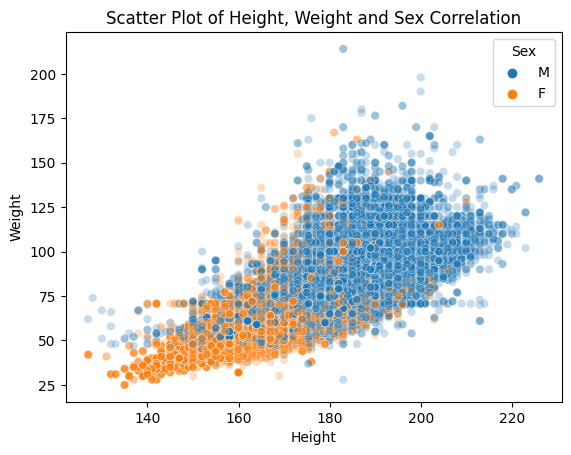

In [39]:
sns.scatterplot(data=df, x= "Height", y = "Weight", hue = "Sex", alpha = 0.25)
plt.title("Scatter Plot of Height, Weight and Sex Correlation")

Although having a lot of data and this causing superposition of the points, we can clearly see that the weight tend to increase accordingly with the height of the athlete, and that women athletes are usually shorter and lighter than their men counterparts.

To see this correlation better, we can use the **.corr()** method *(the closest to one the value is, the strongest the correlation between the variables)*

In [27]:
df[["Age", "Height", "Weight",]].corr()

,Age,Height,Weight
Age,1.000000,0.106944,0.161847
Height,0.106944,1.000000,0.786609
Weight,0.161847,0.786609,1.000000


Apart from the obvious strong correlation between the same variables, we can now see that the Height and Weight is rarely defined by the age of the athlete, and, as we estimated in the scatterplot, Height and Weight have such a strong correlation and tend to increase together **(The taller you are, the heavier you are, in other words)**

Lets show this correlation even more clearly with a heatmap.

Text(0.5, 1.0, 'Heat Map of Numeric Variables Correlation')

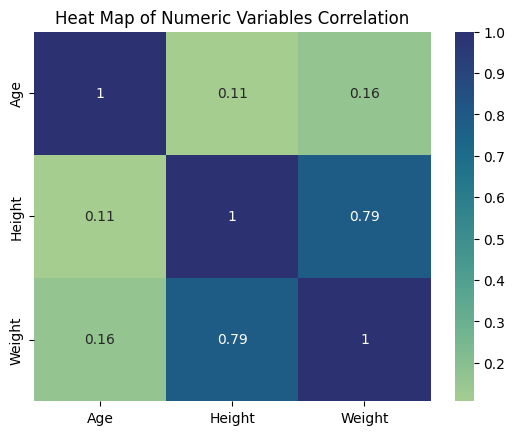

In [28]:
sns.heatmap(df[['Age', 'Height', 'Weight']].corr(), annot = True, cmap = "crest")
plt.title("Heat Map of Numeric Variables Correlation")

Now we are going to take a look to the 'Sex' and 'Age' variables, to see how many men and women have participated and how their age affects the data.

Text(0.5, 1.0, 'Number of Athletes divided by Sex and Age HistPlot')

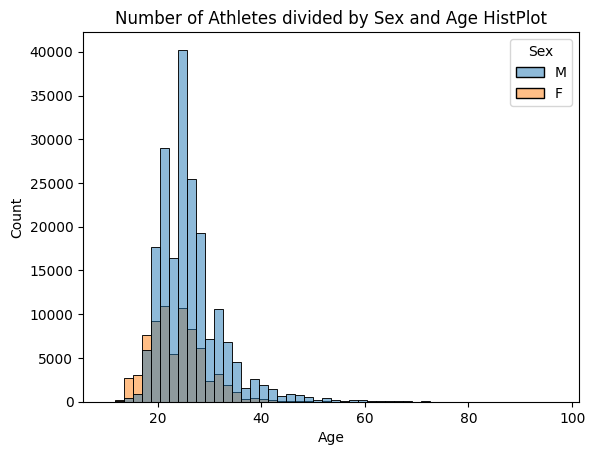

In [42]:
sns.histplot(data=df, x = 'Age', hue = 'Sex', bins = 50)
plt.title("Number of Athletes divided by Sex and Age HistPlot")

Here we can see that a lot more men have participated historically in the OOGG, and that most of the young athletes below the 20 year old mark tend to be women. Let's divide the graphic by gender.

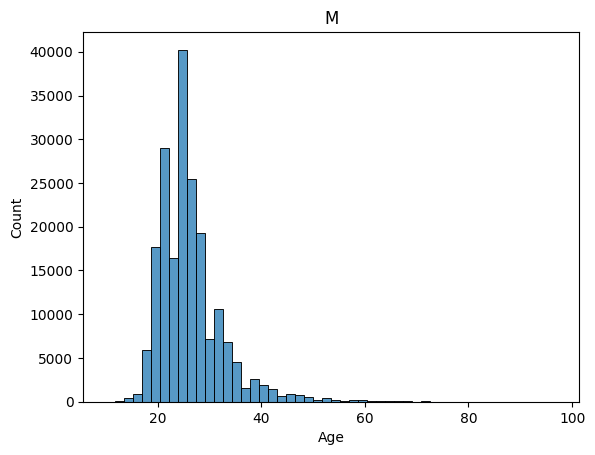

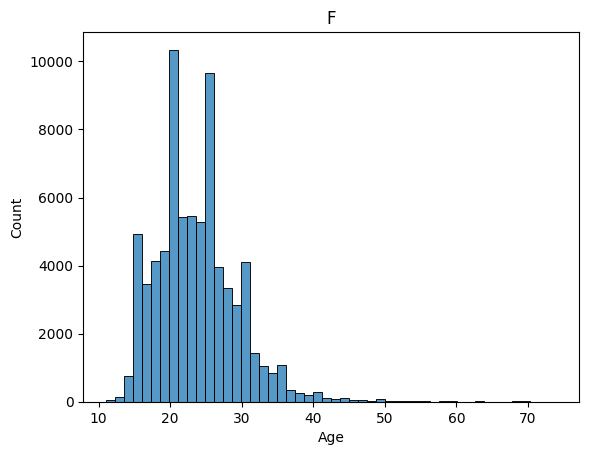

In [49]:
for value in df ['Sex'].value_counts().index:
    sns.histplot(data=df [df['Sex'] == value], x = 'Age', bins = 50)
    plt.title(value)
    plt.show()

These two graphics are very useful because they show us the age ranges and the number of Masculine and Femenine athletes. For example, we can see that while the women tend to start at an earlier age, the oldest athletes are usually men.

<function matplotlib.pyplot.show(close=None, block=None)>

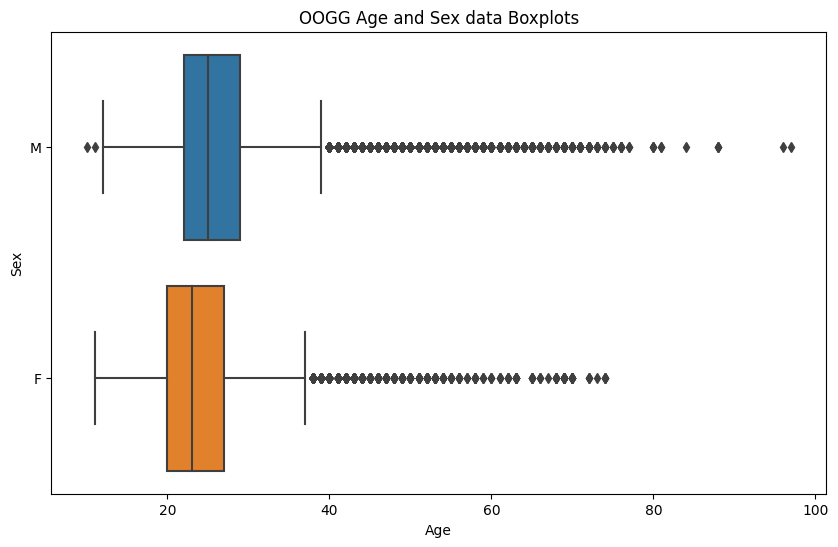

In [48]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Age', y = 'Sex')
plt.title ("OOGG Age and Sex data Boxplots")
plt.show

Here we can observe two important points:

* The Women boxplot starts to draw earlier, and lower ages are considered typical comparing it with the Men one.
* Men tend to live longer and that is why their atypical values are greater.

<function matplotlib.pyplot.show(close=None, block=None)>

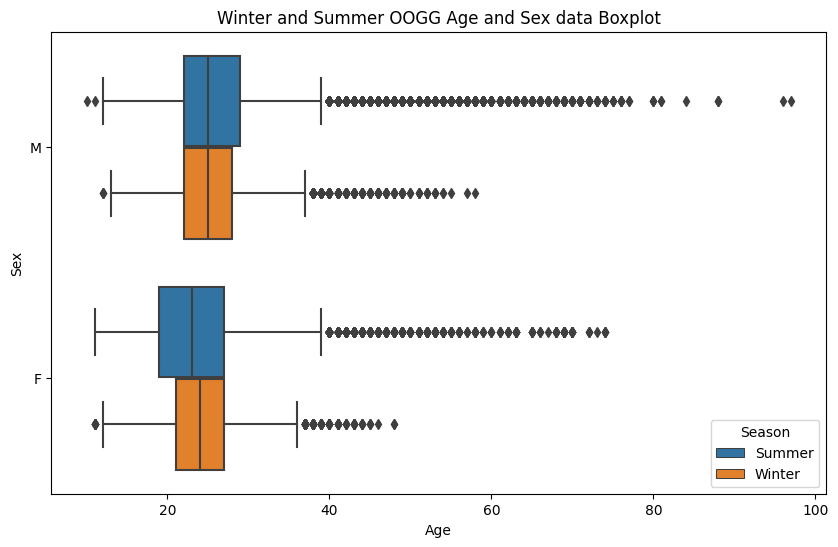

In [32]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Age', y = 'Sex', hue = "Season")
plt.title ("Winter and Summer OOGG Age and Sex data Boxplot")
plt.show

By doing a deeper analysis and by dividing the data in Summer And Winter Seasons, we can see that is more common to see elderly athletes during Summer Olympics, while in The Winter Events the Atypical Data is much more bounded. This is probably due to the weather conditions and also the popularity of these OOGG compared to the ones during the Summer Season. 

Lastly, we are going to see how the age and its typical and atypical values have been fluctuating along the OOGG Olympics history.

<Axes: xlabel='Year', ylabel='Age'>

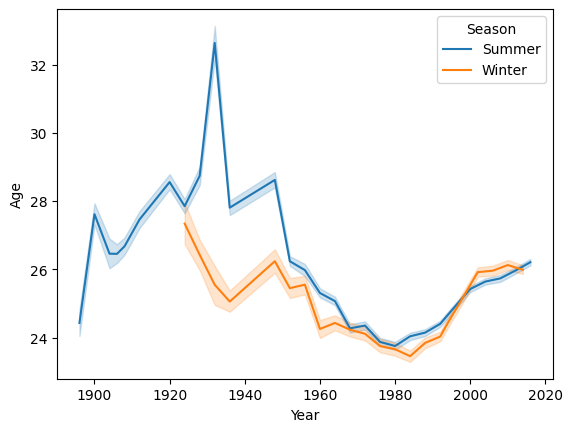

In [33]:
sns.lineplot(data = df, x = 'Year', y = 'Age', hue = 'Season')

Here we can visualize how the "Age" variable has behaved since the first OOGG in Athenas 1896, until the ones in Rio 2016.

This graph shows us how the average age started at about 25 years, and then rose until reaching a peak of 33 years in the 1930s, just to fall abruptly with the lowest value in 1980 at around 24 years, and it slightly began to rose again until approximately 26 years of age during the years 2000 and 2010.

If we remember the things that happened during the first half of the 20th Century, two events occurred that greatly marked our history, which are the First and the Second World Wars (1914 - 1918 and 1939 - 1945 respectively). And what is curious is that during this period of time, the average age of athletes rose drastically and reached historical peaks, this could be due to the fact that young people were recruited to fight for their country (and unfortunately many died doing so) and this caused countries to have to resort to older athletes to form their teams.

After the WWII, which claimed millions of lives, the average dropped drastically for this reason and over time it "normalized" until reaching values similar to those at the beginning, this also indicating that the majority of athletes are in their physical prime to participate in the OOGG between 24 - 26 years old.